# Machine Learning with Tree-Based Models in Python

In [1]:
# Write and run code here
import pandas as pd
df = pd.read_csv('datasets/wbc.csv')
print(df.shape)

(569, 33)


# PART ONE

## 1. Decision-Tree for Classification

## 1.1 CourseOverview
- Chap 1: Classication And Regression Tree(CART)
- Chap 2: The Bias-Variance Tradeoff
- Chap 3: Bagging and Random Forests
- Chap 4: Boosting
- Chap 5: ModelTuning

## 1.2 Classification-tree 
- Sequence of `if-else` questions about individual features.
- Objective: infer class labels.
- Able to capture non-linear relationships between features and labels.
- Don't require feature scaling (ex:Standardization,..)

## 1.3 Breast Cancer Dataset in 2D
![Screen Shot 2023-08-27 at 12.48.40 AM](Screen%20Shot%202023-08-27%20at%2012.48.40%20AM.png)


## 1.4 Decision-tree Diagram
![Screen Shot 2023-08-27 at 12.49.17 AM](Screen%20Shot%202023-08-27%20at%2012.49.17%20AM.png)


## 1.5  Classification-treeinscikit-learn

In [ ]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score
# Split the dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2, random_state=1)
# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)


## Classification-treeinscikit-learn

In [ ]:
# Fit dt to the training set
dt.fit(X_train,y_train) 
# Predict the test set labels
y_pred = dt.predict(X_test)
# Evaluate the test-set accuracy
accuracy_score(y_test, y_pred)

## 1.6 Decision Regions 
- **Decision region:** region in the feature space where all instances are assigned to one class label.
- **Decision Boundary:** surface separating different decisionr egions.

![Screen Shot 2023-08-27 at 12.54.17 AM](Screen%20Shot%202023-08-27%20at%2012.54.17%20AM.png)


## 1.7 Decision Regions: CART vs. Linear Model


![Screen Shot 2023-08-27 at 12.54.31 AM](Screen%20Shot%202023-08-27%20at%2012.54.31%20AM.png)


## Train your first classification tree
In this exercise you'll work with the Wisconsin Breast Cancer Dataset from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (radius_mean) and its mean number of concave points (concave points_mean).

The dataset is already loaded in your workspace and is split into 80% train and 20% test. The feature matrices are assigned to X_train and X_test, while the arrays of labels are assigned to y_train and y_test where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor. To obtain reproducible results, we also defined a variable called SEED which is set to 1.

### Instructions

- Import DecisionTreeClassifier from sklearn.tree.
- Instantiate a DecisionTreeClassifier dt of maximum depth equal to 6.
- Fit dt to the training set.
- Predict the test set labels and assign the result to y_pred.

In [2]:
SEED = 1
X = df[['radius_mean', 'concave points_mean']]
y = df['diagnosis'].map({'M': 1, 'B': 0})

from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score
# Split the dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2, random_state=1)

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[1 0 0 1 0]


## Evaluate the classification tree
Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

The trained model dt from the previous exercise is loaded in your workspace along with the test set features matrix X_test and the array of labels y_test.

### Instructions

- Import the function accuracy_score from sklearn.metrics.
- Predict the test set labels and assign the obtained array to y_pred.
- Evaluate the test set accuracy score of dt by calling accuracy_score() and assign the value to acc.

In [3]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


## Logistic regression vs classification tree
A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

We have written a custom function called plot_labeled_decision_regions() that you can use to plot the decision regions of a list containing two trained classifiers. You can type help(plot_labeled_decision_regions) in the IPython shell to learn more about this function.

X_train, X_test, y_train, y_test, the model dt that you've trained in an earlier exercise , as well as the function plot_labeled_decision_regions() are available in your workspace.

### Instructions

- Import `LogisticRegression` from `sklearn.linear_model`.
- Instantiate a `LogisticRegression` model and assign it to `logreg`.
- Fit `logreg` to the training set.
- Review the plot generated by `plot_labeled_decision_regions()`.

In [4]:
from mlxtend.plotting import plot_decision_regions

def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
    
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''Models should be a list containing only two trained classifiers.''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''X has to be a pandas DataFrame with two numerical features.''')
    if not isinstance(y, pd.Series):
        raise Exception('''y has to be a pandas Series corresponding to the labels.''')
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
            ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
            ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()

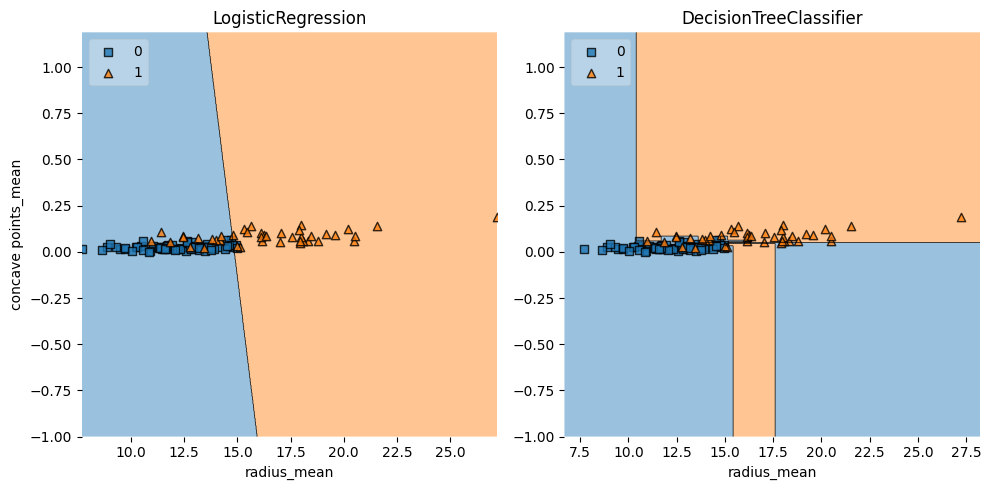

In [5]:
import matplotlib.pyplot as plt
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

## 2. Classification-Tree Learning

## 2.1 Building Blocks of a Decision-Tree
- **Decision-Tree:** data structure consisting of a hierarchy of nodes.
- **Node:** question or prediction. Threekindsofnodes:
    - **Root:** no parent node, question giving rise to two children nodes.
    - **Internal node:** one parent node,question giving rise to two children nodes.
    - **Leaf:** one parent node, no children nodes --> prediction.



## 2.2 Prediction

![Screen Shot 2023-08-27 at 10.00.11 AM](Screen%20Shot%202023-08-27%20at%2010.00.11%20AM.png)


## 2.3 Information Gain (IG)

![Screen Shot 2023-08-27 at 10.00.28 AM](Screen%20Shot%202023-08-27%20at%2010.00.28%20AM.png)


## Information Gain (IG)

![Screen Shot 2023-08-27 at 10.03.18 AM](Screen%20Shot%202023-08-27%20at%2010.03.18%20AM.png)

### Criteria to measure the impurity of a node _I_(node):
- gini index,
- entropy....


## 2.4 Classification-Tree Learning
- Nodes are grown recursively.
- At each node, split the data based on: 
    - feature, f and split-point sp to maximize _IG_ (node).
- If _IG_ (node)=0, declare the node a leaf....


In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score
# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)
# Instantiate dt, set 'criterion' to 'gini'
dt = DecisionTreeClassifier(criterion='gini', random_state=1)

## 2.5 Information Criterion in scikit-learn

In [ ]:
# Fit dt to the training set
dt.fit(X_train,y_train)
# Predict test-set labels
y_pred= dt.predict(X_test)
# Evaluate test-set accurac
yaccuracy_score(y_test, y_pred)

## Using entropy as a criterion

In this exercise, you'll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.

`X_train` as well as the array of labels `y_train` are available in your workspace.

### Instructions

- Import DecisionTreeClassifier from sklearn.tree.
- Instantiate a DecisionTreeClassifier dt_entropy with a maximum depth of 8.
- Set the information criterion to 'entropy'.
- Fit dt_entropy on the training set.

In [6]:
X_train = pd.read_csv('datasets/download (1).csv', index_col=[0])
y_train = pd.read_csv('datasets/download (2).csv', index_col=[0])
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

## Entropy vs Gini index
In this exercise you'll compare the test set accuracy of dt_entropy to the accuracy of another tree named dt_gini. The tree dt_gini was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword 'gini'.

`X_test`, `y_test`, `dt_entropy`, as well as `accuracy_gini` which corresponds to the test set accuracy achieved by `dt_gini` are available in your workspace.

### Instructions

- Import accuracy_score from sklearn.metrics.
- Predict the test set labels of dt_entropy and assign the result to y_pred.
- Evaluate the test set accuracy of dt_entropy and assign the result to accuracy_entropy.
- Review accuracy_entropy and accuracy_gini.

In [7]:
X_test = pd.read_csv('datasets/download (3).csv', index_col=[0])
y_test = pd.read_csv('datasets/download (4).csv', index_col=[0])


# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)
y_pred1 = dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)
accuracy_gini = accuracy_score(y_test, y_pred1)

# Print accuracy_entropy
print(f'Accuracy achieved by using entropy: {accuracy_entropy:.3f}')

# Print accuracy_gini
print(f'Accuracy achieved by using the gini index: {accuracy_gini:.3f}')

Accuracy achieved by using entropy: 0.921
Accuracy achieved by using the gini index: 0.921


## 3 Decision-Tree for Regression

## 3.1 Auto-mpg Dataset

![Screen Shot 2023-08-27 at 10.10.42 AM](Screen%20Shot%202023-08-27%20at%2010.10.42%20AM.png)


## 3.2 Auto-mpg with one feature


![Screen Shot 2023-08-27 at 10.11.20 AM](Screen%20Shot%202023-08-27%20at%2010.11.20%20AM.png)


## 3.3 Regression-Tree in scikit-learn

## 3.4 

In [ ]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# Import train_test_split 
from sklearn.model_selection import train_test_split
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=3)
# Instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

In [ ]:
# Fit 'dt' to the training-set
dt.fit(X_train, y_train)
# Predict test-set labels
y_pred = dt.predict(X_test)
# Compute test-set MSE
mse_dt =  MSE(y_test, y_pred)
# Compute test-set RMSE 
rmse_dt = mse_dt**(1/2)
# Print rmse_dt
print(rmse_dt)

## 3. 4 Information Criterion for Regression-Tree

![Screen Shot 2023-08-27 at 10.16.11 AM](Screen%20Shot%202023-08-27%20at%2010.16.11%20AM.png)


## 3.5 Prediction

![Screen Shot 2023-08-27 at 10.16.27 AM](Screen%20Shot%202023-08-27%20at%2010.16.27%20AM.png)


## 3.6 Linear Regression vs. Regression-Tree

![Screen Shot 2023-08-27 at 10.17.53 AM](Screen%20Shot%202023-08-27%20at%2010.17.53%20AM.png)


## Train your first regression tree
In this exercise, you'll train a regression tree to predict the mpg (miles per gallon) consumption of cars in the auto-mpg dataset using all the six available features.

The dataset is processed for you and is split to 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

### Instructions

- Import `DecisionTreeRegressor` from `sklearn.tree`.
- Instantiate a `DecisionTreeRegressor` dt with maximum depth 8 and `min_samples_leaf` set to 0.13.
- Fit dt to the training set.

In [9]:
X_train = pd.read_csv('datasets/download (5).csv', index_col=[0])
y_train = pd.read_csv('datasets/download (6).csv', index_col=[0])
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

## Evaluate the regression tree

In this exercise, you will evaluate the test set performance of dt using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

The features matrix X_test, the array y_test, as well as the decision tree regressor dt that you trained in the previous exercise are available in your workspace.

### Instructions

- Import the function mean_squared_error as MSE from sklearn.metrics.
- Predict the test set labels and assign the output to y_pred.
- Compute the test set MSE by calling MSE and assign the result to mse_dt.
- Compute the test set RMSE and assign it to rmse_dt.

In [10]:
X_test = pd.read_csv('datasets/download (7).csv', index_col=[0])
y_test = pd.read_csv('datasets/download (8).csv', index_col=[0])

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.37


## Linear regression vs regression tree
In this exercise, you'll compare the test set RMSE of dt to that achieved by a linear regression model. We have already instantiated a linear regression model lr and trained it on the same dataset as dt.

The features matrix X_test, the array of labels y_test, the trained linear regression model lr, mean_squared_error function which was imported under the alias MSE and rmse_dt from the previous exercise are available in your workspace.

### Instructions

- Predict test set labels using the linear regression model (lr) and assign the result to y_pred_lr.
- Compute the test set MSE and assign the result to mse_lr.
- Compute the test set RMSE and assign the result to rmse_lr.

In [13]:
# import LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 5.10
Regression Tree test set RMSE: 4.37


# PART TWO

## 1 Generalization Error

## 1.1 Supervised Learning - Under the Hood
- Supervised Learning: $y=f(x), f$ is unknown.



![Screen Shot 2023-08-27 at 12.45.20 PM](Screen%20Shot%202023-08-27%20at%2012.45.20%20PM.png)


## 1.2 Goals of Supervised Learning

- Find a model that best approximates $f:\hat{f} \approx f$
- $\hat{f}$ can be Logistic Regression, Decision Tree, Neural Network...
- Discard noise as much as possible.
- **End goal:** should achieve a low predictive error on unseen datasets.

## 1.3 Difficulties in Approximating $f$
- Overfitting: $\hat{f}(x)$ fits the training set noise.
- Underfitting: $\hat{f}$ is not flexible enough to approximate $f$.

### Overfitting

![Screen Shot 2023-08-27 at 12.56.54 PM](Screen%20Shot%202023-08-27%20at%2012.56.54%20PM.png)


### Underfitting

![Screen Shot 2023-08-27 at 12.57.00 PM](Screen%20Shot%202023-08-27%20at%2012.57.00%20PM.png)


## 1.4 Generalization Error 
- Generalization Error of $\hat{f}$:Does $\hat{f}$ generalize well on unseen data?
- It can be decomposed as follows: Generalization of Error $\hat{f}=bias^2+variance+\text{irreducible error}$

## 1.5 Bias:
- **Bias:** error term that tells you,on average,how much $\hat{f} \not= f$
- High Bias model leads to **underfitting**

![Screen Shot 2023-08-27 at 1.03.33 PM](Screen%20Shot%202023-08-27%20at%201.03.33%20PM.png)


## 1.6 Variance
- **Variance:** tells you how much $\hat{f}$ is inconsistent over different training sets.
- - High varianve model leads to **overfitting**

![Screen Shot 2023-08-27 at 1.04.33 PM](Screen%20Shot%202023-08-27%20at%201.04.33%20PM.png)


## 1.7 Model Complexity
- Model Complexity: sets the exibility of $\hat{f}$.
- Example: Maximum tree depth, Minimum samples per leaf,...




## Bias-Variance Tradeoff

![Screen Shot 2023-08-27 at 1.07.46 PM](Screen%20Shot%202023-08-27%20at%201.07.46%20PM.png)

## Bias-Variance Tradeoff: A Visual Explanation

![Screen Shot 2023-08-27 at 1.08.00 PM](Screen%20Shot%202023-08-27%20at%201.08.00%20PM.png)


## 2. Diagnosing Bias and Variance Problems

## 2.1 Estimating the Generalization Error
- How do we estimate the generalization error of a model?
- Cannot be done directly because:
    - $f$ is unknown,
    - usually you only have one dataset,
    - noise is unpredictable.

## 2.2 Estimating the Generalization Error
Solution:  
- split the data to training and test sets,
- fit $\hat{f}$ to the training set,
- evaluate the error $\hat{f}$ of on the unseen test set.
- generalization error of $\hat{f} \approx $ test set error of $\hat{f}$.


## 2.3 Better Model Evaluation with Cross
- Validation Test set should not be touched until we are confident about $\hat{f}'s performance.
- Evaluating $\hat{f} on training set: biased estimate, has already seen all training points.
- Solution → Cross-Validation(CV): 
    - K-Fold CV,
    - Hold-Out CV.

## 2.3.1 K-Fold CV
![Screen Shot 2023-08-27 at 3.37.58 PM](Screen%20Shot%202023-08-27%20at%203.37.58%20PM.png)

![Screen Shot 2023-08-27 at 3.38.14 PM](Screen%20Shot%202023-08-27%20at%203.38.14%20PM.png)


## 2.4 Diagnose Variance Problems 
- If $\hat{f}$ suffers from high variance: CV error of  $\hat{f} >$ training set error
- $\hat{f}$ is said to overfit the training set. To remedy overfitting:  
    - decrease model complexity, 
    - for ex: decrease max depth, increase min samples per leaf,...
    - gather more data,..

## 2.5 Diagnose Bias Problems
- if $\hat{f}$ suffers from high bias: CV error of  $\hat{f} \approx  \text{training set error of}  \hat{f} >> \text{desired error}.$ 
- $\hat{f}$ is said to underfit the training set.  To remedy underfitting: 
    - increase model complexity, 
    - for ex: increase max depth, decrease min samples per leaf,...
    - gather more relevant features,..

## 2.6 K-Fold CV in sklearn on the Auto Dataset

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
# Set seed for reproducibilitySEED = 123# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=SEED)
# Instantiate decision tree regressor and assign it to 'dt'
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.14,random_state=SEED)


In [ ]:
# Evaluate the list of MSE ontained by 10-fold CV 
# Set n_jobs to -1 in order to exploit all CPU cores in computation
MSE_CV = - cross_val_score(dt, X_train, y_train, cv= 10, scoring='neg_mean_squared_error',n_jobs = -1)
# Fit 'dt' to the training set                        
dt.fit(X_train, y_train)
# Predict the labels of training set
y_predict_train = dt.predict(X_train)
# Predict the labels of test set
y_predict_test = dt.predict(X_test)


In [ ]:
# CV MSE  
print('CV MSE: {:.2f}'.format(MSE_CV.mean()))
# Training set 
MSEprint('Train MSE: {:.2f}'.format(MSE(y_train, y_predict_train)))
# Test set 
MSEprint('Test MSE: {:.2f}'.format(MSE(y_test, y_predict_test)))

## Instantiate the model

In the following set of exercises, you'll diagnose the bias and variance problems of a regression tree. The regression tree you'll define in this exercise will be used to predict the mpg consumption of cars from the auto dataset using all available features.

We have already processed the data and loaded the features matrix X and the array y in your workspace. In addition, the DecisionTreeRegressor class was imported from sklearn.tree.

### Instructions

- Import `train_test_split` from `sklearn.model_selection`.
- Split the data into 70% train and 30% test.
- Instantiate a `DecisionTreeRegressor` with max depth 4 and `min_samples_leaf` set to 0.26.

In [6]:
# Import pandas as pd
import pandas as pd

# import the dataset
X = pd.read_csv('datasets/download (9).csv', index_col=[0])
y = pd.read_csv('datasets/download (10).csv', index_col=[0])

# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

## Evaluate the 10-fold CV error
In this exercise, you'll evaluate the 10-fold CV Root Mean Squared Error (RMSE) achieved by the regression tree dt that you instantiated in the previous exercise.

In addition to dt, the training data including `X_train` and `y_train` are available in your workspace. We also imported `cross_val_score` from `sklearn.model_selection`.

Note that since `cross_val_score` has only the option of evaluating the negative MSEs, its output should be multiplied by negative one to obtain the MSEs. The CV RMSE can then be obtained by computing the square root of the average MSE.

### Instructions

- Compute dt's 10-fold cross-validated MSE by setting the scoring argument to 'neg_mean_squared_error'.
- Compute RMSE from the obtained MSE scores.

In [5]:
# import cross_val_score from sklearn.model_selection
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(0.5)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


## Evaluate the training error
You'll now evaluate the training set RMSE achieved by the regression tree dt that you instantiated in a previous exercise.

In addition to `dt`, `X_train` and `y_train` are available in your workspace.

Note that in `scikit-learn`, the MSE of a model can be computed as follows:

`MSE_model = mean_squared_error(y_true, y_predicted)`  
where we use the function mean_squared_error from the metrics module and pass it the true labels `y_true` as a first argument, and the predicted labels from the model `y_predicted` as a second argument.

### Instructions

- Import `mean_squared_error` as MSE from `sklearn.metrics`.
- Fit `dt` to the training set.
- Predict `dt`'s training set labels and assign the result to `y_pred_train`.
- Evaluate `dt`'s training set RMSE and assign it to `RMSE_train`.

In [8]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(0.5)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


## 3 Ensemble Learning

## High bias or high variance? (Exercise)
In this exercise you'll diagnose whether the regression tree dt you trained in the previous exercise suffers from a bias or a variance problem.

The training set RMSE (`RMSE_train`) and the CV RMSE (`RMSE_CV`) achieved by `dt` are available in your workspace. In addition, we have also loaded a variable called `baseline_RMSE` which corresponds to the root mean-squared error achieved by the regression-tree trained with the disp feature only (it is the RMSE achieved by the regression tree trained in chapter 1, lesson 3). Here `baseline_RMSE` serves as the baseline RMSE above which a model is considered to be underfitting and below which the model is considered 'good enough'.

Does `dt` suffer from a high bias or a high variance problem?

**Correct! `dt` is indeed underfitting the training set as the model is too constrained to capture the nonlinear dependencies between features and labels.**

## 3.1 Advantages of CARTs 
- Simple to understand.
- Simple to interpret.
- Easy to use.
- Flexibility: ability to describe non-linear dependencies.
- Preprocessing: no need to standardize or normalize features,...

## 3.2 LimitationsofCARTs
- Classication: can only produce orthogonal decision boundaries.
- Sensitive to small variations in the training set.
- High variance: unconstrained CARTs may overfit the training set.
- Solution: ensemble learning.


## 3.2 EnsembleLearning
- Train different models on the same dataset.
- Let each model make its predictions.
- Meta-model: aggregates predictions of individual models.
- Final prediction: more robust and less prone to errors.
- Best results: models are skillful in different ways.

## 3.3 Ensemble Learning: A Visual Explanation

![Screen Shot 2023-08-27 at 3.57.23 PM](Screen%20Shot%202023-08-27%20at%203.57.23%20PM.png)



## 3.4 Ensemble Learning in Practice: Voting Classifier
- Binary classication task.
- N classifiers make predictions: $P_1,P_2,...,P_N$ with $P_i = \text{0 or 1}$.
- Meta-model prediction: hard voting.

## Hard Voting

![Screen Shot 2023-08-27 at 4.00.05 PM](Screen%20Shot%202023-08-27%20at%204.00.05%20PM.png)


## Voting Classifier in sklearn (Breast-Cancer dataset)

In [ ]:
# Import functions to compute accuracy and split data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
# Set seed for reproducibility
SEED = 1

In [ ]:
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= SEED)
# Instantiate individual classifiers
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)
# Define a list called classifier that contains the tuples (classifier_name, classifier)

classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

In [ ]:
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
    #fit clf to the training set    
    clf.fit(X_train, y_train)
    # Predict the labels of the test set    
    y_pred = clf.predict(X_test)
    # Evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

In [ ]:
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers) 
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)   
y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
print('Voting Classifier: {.3f}'.format(accuracy_score(y_test, y_pred)))

## Define the ensemble
In the following set of exercises, you'll work with the Indian Liver Patient Dataset from the UCI Machine learning repository.

In this exercise, you'll instantiate three classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset.

The classes `LogisticRegression`, `DecisionTreeClassifier`, and `KNeighborsClassifier` under the alias KNN are available in your workspace.

### Instructions

- Instantiate a Logistic Regression classifier and assign it to `lr`.
- Instantiate a KNN classifier that considers 27 nearest neighbors and assign it to knn.
- Instantiate a Decision Tree Classifier with the parameter `min_samples_leaf` set to 0.13 and assign it to `dt`.

In [12]:
# Basic Imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

## Evaluate individual classifiers

In this exercise you'll evaluate the performance of the models in the list classifiers that we defined in the previous exercise. You'll do so by fitting each classifier on the training set and evaluating its test set accuracy.

The dataset is already loaded and preprocessed for you (numerical features are standardized) and it is split into 70% train and 30% test. The features matrices `X_train` and `X_test`, as well as the arrays of labels `y_train` and `y_test` are available in your workspace. In addition, we have loaded the list classifiers from the previous exercise, as well as the function accuracy_score() from sklearn.metrics.

### Instructions

- Iterate over the tuples in classifiers. Use clf_name and clf as the for loop variables:
- Fit clf to the training set.
- Predict clf's test set labels and assign the results to y_pred.
- Evaluate the test set accuracy of clf and print the result.

In [16]:
X_train = pd.read_csv('datasets/download1.csv', index_col=[0])
y_train = pd.read_csv('datasets/download2.csv', index_col=[0])
X_test = pd.read_csv('datasets/X_test.csv', index_col=[0])
y_test = pd.read_csv('datasets/y_test.csv', index_col=[0])

# import accuracy_score from sklear.metrics
from sklearn.metrics import accuracy_score
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.741
K Nearest Neighbours : 0.701
Classification Tree : 0.707


## Better performance with a Voting Classifier

Finally, you'll evaluate the performance of a voting classifier that takes the outputs of the models defined in the list classifiers and assigns labels by majority voting.

`X_train`, `X_test`,`y_train`, `y_test`, the list classifiers defined in a previous exercise, as well as the function accuracy_score from sklearn.metrics are available in your workspace.

### Instructions

- Import `VotingClassifier` from `sklearn.ensemble`.
- Instantiate a `VotingClassifier` by setting the parameter estimators to classifiers and assign it to vc.
- Fit `vc` to the training set.
- Evaluate `vc`'s test set accuracy using the test set predictions `y_pred`.

In [17]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.730


# PART THREE

## 1 Bagging

## 1.1 Ensemble Methods

### Voting Classifier
- same training set,
- $\not=$ algorithms.
### Bagging 
- one algorithm, 
- $\not=$ subsets of the training set.

### 1.2 Bagging
- Bagging: Bootstrap Aggregation.
- Uses a technique known as the bootstrap.
- Reduces variance of individual models in the ensemble.

## 1.3 Bootstrap

![Screen Shot 2023-08-27 at 8.57.28 PM](Screen%20Shot%202023-08-27%20at%208.57.28%20PM.png)


## 1.4 Bagging: Training

![Screen Shot 2023-08-27 at 8.58.34 PM](Screen%20Shot%202023-08-27%20at%208.58.34%20PM.png)


## Bagging: Prediction

![Screen Shot 2023-08-27 at 9.03.06 PM](Screen%20Shot%202023-08-27%20at%209.03.06%20PM.png)

## 1.5 Bagging: Classification & Regression 
### Classification:
- Aggregates predictions by majority voting. 
- Bagging Classifier in scikit-learn.
### Regression: 
- Aggregates predictions through averaging.
- Bagging Regressor in scikit-learn.

## 1.6 Bagging Classifier in sklearn (Breast-Cancer dataset)

In [ ]:
# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Set seed for reproducibility
SEED = 1
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=SEED)

In [ ]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)
# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)
# Fit 'bc' to the training set
bc.fit(X_train, y_train)
# Predict test set labels
y_pred = bc.predict(X_test)
# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

## efine the bagging classifier
In the following exercises you'll work with the Indian Liver Patient dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.

### Instructions

- Import `DecisionTreeClassifier` from `sklearn.tree` and `BaggingClassifier` from `sklearn.ensemble`.
- Instantiate a `DecisionTreeClassifier` called `dt`.
- Instantiate a `BaggingClassifier` called `bc` consisting of 50 trees.

In [4]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

## Evaluate Bagging performance

Now that you instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.

The Indian Liver Patient dataset is processed for you and split into 80% train and 20% test. The feature matrices `X_train` and `X_test`, as well as the arrays of labels `y_train` and `y_test` are available in your workspace. In addition, we have also loaded the bagging classifier bc that you instantiated in the previous exercise and the function `accuracy_score()` from `sklearn.metrics`.

### Instructions

- Fit `bc` to the training set.
- Predict the test set labels and assign the result to `y_pred`.
- Determine `bc`'s test set accuracy.

In [6]:
# import basic package and data
import pandas as pd
from sklearn.metrics import accuracy_score
X_train = pd.read_csv('datasets/X_trainN.csv', index_col=[0])
y_train = pd.read_csv('datasets/y_trainN.csv', index_col=[0])
X_test = pd.read_csv('datasets/X_testN.csv', index_col=[0])
y_test = pd.read_csv('datasets/y_testN.csv', index_col=[0])

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.67


## 2. Out Of Bag Evaluation

## 2.1 Bagging
- some instances maybe sampled several times for one model,
- other instances may not be sampled at all.

## 2.2 Out Of Bag (OOB) instances 
- On average,for each model,63% of the training instances are sampled.
- The remaining 37% constitute the OOB instances.

## 2.3 OOB Evaluation


![Screen Shot 2023-08-27 at 9.10.42 PM](Screen%20Shot%202023-08-27%20at%209.10.42%20PM.png)


## 2.4 OOB Evaluation in sklearn (Breast Cancer Dataset)

In [ ]:
# Import models and split utility function
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Set seed for reproducibility
SEED = 1
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size= 0.3, stratify= y, random_state=SEED)

In [ ]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4,                            min_samples_leaf=0.16,                            random_state=SEED)
# Instantiate a BaggingClassifier 'bc'; set oob_score = True 
bc = BaggingClassifier(base_estimator=dt, n_estimators=300,oob_score=True, n_jobs=-1)
# Fit 'bc' to the training set
bc.fit(X_train, y_train)
# Predict the test set labels
y_pred = bc.predict(X_test)

In [ ]:
# Evaluate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)
# Extract the OOB accuracy from 'bc'
oob_accuracy = bc.oob_score_
# Print test set accuracy
print('Test set accuracy: {:.3f}'.format(test_accuracy))
# Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

## Prepare the ground

In the following exercises, you'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter oob_score to True during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the .oob_score_ attribute from the corresponding instance.

In your environment, we have made available the class `DecisionTreeClassifier` from `sklearn.tree`.

### Instructions

- Import `BaggingClassifier` from `sklearn.ensemble`.
- Instantiate a `DecisionTreeClassifier` with `min_samples_leaf` set to 8.
- Instantiate a `BaggingClassifier` consisting of 50 trees and set `oob_score` to `True`.

In [7]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

## OOB Score vs Test Set Score
Now that you instantiated bc, you will fit it to the training set and evaluate its test set and OOB accuracies.

The dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the classifier bc instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

### Instructions

- Fit bc to the training set and predict the test set labels and assign the results to y_pred.
- Evaluate the test set accuracy `acc_test` by calling `accuracy_score`.
- Evaluate `bc`'s OOB accuracy `acc_oob` by extracting the attribute `oob_score_` from bc.

In [8]:
# import dataset

X_train = pd.read_csv('datasets/X_trainOOB.csv', index_col=[0])
y_train = pd.read_csv('datasets/y_trainOOB.csv', index_col=[0])
X_test = pd.read_csv('datasets/X_testOOB.csv', index_col=[0])
y_test = pd.read_csv('datasets/y_testOOB.csv', index_col=[0])

# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.698, OOB accuracy: 0.702


## 3 Random Forests

## 3.1 Bagging 
- Base estimator: Decision Tree, Logistic Regression, Neural Net,...
- Each estimator is trained on a distinct bootstrap sample of the training set
- Estimators use all features for training and prediction

## 3.2 Further Diversity with RandomF orests
- Base estimator: Decision Tree 
- Each estimator is trained on a different bootstrap sample having the same size as the training set
- RF introduces further randomization in the training of individual trees
- $d$ features are sampled at each node without replacement ($ d< \text{total number of features}$)

## 3.3 Random Forests: Training

![Screen Shot 2023-08-27 at 9.21.14 PM](Screen%20Shot%202023-08-27%20at%209.21.14%20PM.png)

## 3.4 Random Forests: Prediction

![Screen Shot 2023-08-27 at 9.22.17 PM](Screen%20Shot%202023-08-27%20at%209.22.17%20PM.png)


## 3.5 Random Forests:Classification & Regression
### Classication:
- Aggregates predictions by majority voting
- `RandomForestClassifier` in scikit-learn
### Regression:
- Aggregates predictions through averaging 
- `RandomForestRegressor` in scikit-learn

## 3.6 Random Forests Regressor in sklearn (auto dataset)

In [ ]:
# Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Set seed for reproducibility
SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [ ]:
# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12, random_state=SEED)
# Fit 'rf' to the training set
rf.fit(X_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

## Train an RF regressor

In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the Bike Sharing Demand dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

### Instructions

- Import `RandomForestRegressor` from `sklearn.ensemble`.
- Instantiate a `RandomForestRegressor` called `rf` consisting of 25 trees.
- Fit `rf` to the training set.

In [10]:
X_train = pd.read_csv('datasets/X_trainBikes.csv', index_col=[0])
y_train = pd.read_csv('datasets/y_trainBikes.csv', index_col=[0])
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

## Evaluate the RF regressor
You'll now evaluate the test set RMSE of the random forests regressor rf that you trained in the previous exercise.

The dataset is processed for you and split into 80% train and 20% test. The features matrix `X_test`, as well as the array `y_test` are available in your workspace. In addition, we have also loaded the model rf that you trained in the previous exercise.

### Instructions

- Import mean_squared_error from sklearn.metrics as MSE.
- Predict the test set labels and assign the result to y_pred.
- Compute the test set RMSE and assign it to rmse_test.

In [11]:
# import the datasets
X_test = pd.read_csv('datasets/X_testBikes.csv', index_col=[0])
y_test = pd.read_csv('datasets/y_testBikes.csv', index_col=[0])
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**0.5

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 51.86


## Visualizing features importances

In this exercise, you'll determine which features were the most predictive according to the random forests regressor rf that you trained in a previous exercise.

For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by `rf`. Fortunately, this can be done easily thanks to plotting capabilities of pandas.

We have created a pandas.Series object called importances containing the feature names as index and their importances as values. In addition, matplotlib.pyplot is available as plt and pandas as pd.

### Instructions

- Call the `.sort_values()` method on importances and assign the result to `importances_sorted`.
- Call the `.plot()` method on `importances_sorted` and set the arguments:
- `kind` to `'barh'`
- `color` to `'lightgreen'`

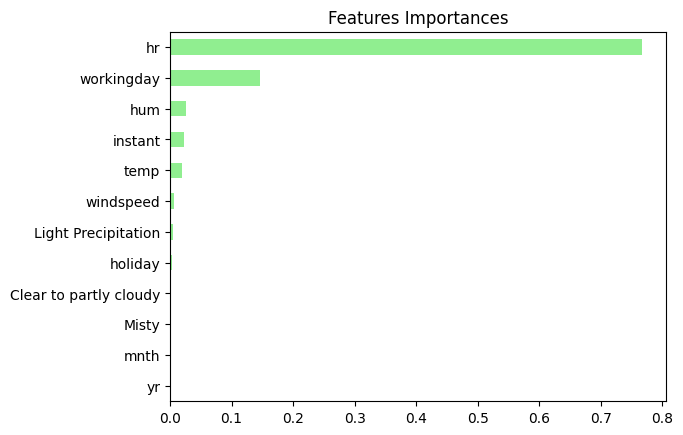

In [14]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Import matplotlib.pyplt as plt
import matplotlib.pyplot as plt

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

## 3.7 Feature Importance
- Tree-based methods: enable measuring the importance of each feature in prediction.
### In `sklearn`:
- how much the tree nodes use a particular feature (weighted average) to reduce impurity
- accessed using the attribute `feature_importance_`

## 3.8 Feature Importance in sklearn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
# Sort importances_rf                                   
sorted_importances_rf = importances_rf.sort_values()   
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen'); plt.show()

## Feature Importance in sklearn

![Screen Shot 2023-08-27 at 9.31.32 PM](Screen%20Shot%202023-08-27%20at%209.31.32%20PM.png)


- # PART FOUR

## 4 AdaBoost

## 4.1 Boosting

- Boosting: Ensemble method combining several weak learners to form a strong learner.
- Weak learner: Model doings lightly better than random guessing.
- Example of weak learner: Decision stump (CART whose maximum depth is 1).

## Boosting
- Train an ensemble of predictors sequentially.
- Each predictor tries to correct its predecessor.
- Most popular boosting methods:
    - AdaBoost,
    - Gradient Boosting.

## 4.1.a Adaboost
- Stands for Adaptive Boosting.
- Each predictor pays more attention to the instances wrongly predicted by its predecessor.
- Achieved by changing the weights of training instances.
- Each predictor is assigned a coefficient $\alpha$.
- $\alpha$ depends on the predictor's training error.

### AdaBoost: Training

![Screen Shot 2023-08-28 at 3.48.15 PM](Screen%20Shot%202023-08-28%20at%203.48.15%20PM.png)

### Learning Rate
Learning rate: $0 < \eta \leq 1$

![Screen Shot 2023-08-28 at 3.46.40 PM](Screen%20Shot%202023-08-28%20at%203.46.40%20PM.png)


### AdaBoost: Prediction
- Classication:
    - Weighted majority voting.
    - Insklearn: AdaBoost Classifier.
- Regression:
    - Weighted average.
    - Insklearn: AdaBoost Regressor.


## AdaBoost Classification in sklearn (Breast Cancer dataset)

In [ ]:
# Import models and utility functions
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
# Set seed for reproducibility
SEED = 1
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=SEED)

In [ ]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=1, random_state=SEED)
# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)
# Fit 'adb_clf' to the training set
adb_clf.fit(X_train, y_train)
# Predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]
# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
# Print adb_clf_roc_auc_score
print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))

## Define the AdaBoost classifier

In the following exercises you'll revisit the Indian Liver Patient dataset which was introduced in a previous chapter. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. However, this time, you'll be training an AdaBoost ensemble to perform the classification task. In addition, given that this dataset is imbalanced, you'll be using the ROC AUC score as a metric instead of accuracy.

As a first step, you'll start by instantiating an AdaBoost classifier.

### Instructions

- Import `AdaBoostClassifier` from `sklearn.ensemble`.
- Instantiate a `DecisionTreeClassifier` with `max_depth` set to 2.
- Instantiate an `AdaBoostClassifier` consisting of 180 trees and setting the `base_estimator` to `dt`.

In [1]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)###

## Train the AdaBoost classifier

Now that you've instantiated the AdaBoost classifier `ada`, it's time train it. You will also predict the probabilities of obtaining the positive class in the test set. This can be done as follows:

Once the classifier ada is trained, call the `.predict_proba()` method by passing `X_test` as a parameter and extract these probabilities by slicing all the values in the second column as follows:

`ada.predict_proba(X_test)[:,1]`  
The Indian Liver dataset is processed for you and split into 80% train and 20% test. Feature matrices `X_train` and `X_test`, as well as the arrays of labels `y_train` and `y_test` are available in your workspace. In addition, we have also loaded the instantiated model ada from the previous exercise.

### Instructions

- Fit `ada` to the training set.
- Evaluate the probabilities of obtaining the positive class in the test set.

In [2]:
# Import datasets
import pandas as pd
X_train = pd.read_csv('datasets/X_trainLiver.csv', index_col=[0])
y_train = pd.read_csv('datasets/y_trainLiver.csv', index_col=[0])
X_test = pd.read_csv('datasets/X_testLiver.csv', index_col=[0])
y_test = pd.read_csv('datasets/y_testLiver.csv', index_col=[0])

# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

## Evaluate the AdaBoost classifier

Now that you're done training ada and predicting the probabilities of obtaining the positive class in the test set, it's time to evaluate ada's ROC AUC score. Recall that the ROC AUC score of a binary classifier can be determined using the `roc_auc_score()` function from `sklearn.metrics`.

The arrays `y_test` and `y_pred_proba` that you computed in the previous exercise are available in your workspace.

### Instructions

- Import `roc_auc_score` from `sklearn.metrics`.
- Compute `ada`'s test set ROC AUC score, assign it to `ada_roc_auc`, and print it out.

In [3]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.70


## 2 Gradient Boosting (GB)

## 2.1 Gradient Boosted Trees
- Sequential correction of predecessor's errors.
- Does not tweak the weights of training instances.
- Fit each predictor is trained using its predecessor's residual errors as labels.
- Gradient Boosted rees: a CART is used as a base learner.

# Gradient Boosted Trees for Regression: Training

![Screen Shot 2023-08-28 at 4.01.45 PM](Screen%20Shot%202023-08-28%20at%204.01.45%20PM.png)

## Shrinkage

![Screen Shot 2023-08-28 at 4.01.58 PM](Screen%20Shot%202023-08-28%20at%204.01.58%20PM.png)



## Gradient Boosted Trees: Prediction
- Regression:
    - $y_{pred} = y_1 + \eta r_1 + \eta r_N $
    - In sklearn:GradientBoostingRegressor.
- Classication:
    - In sklearn: GradientBoostingClassifier.

## MACHINE LEARNING WITH TREE-BASED MODELS IN PYTHON

In [ ]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Set seed for reproducibility
SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=SEED)

In [ ]:
# Instantiate a GradientBoostingRegressor 'gbt'
gbt = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=SEED)
# Fit 'gbt' to the training set
gbt.fit(X_train, y_train)
# Predict the test set labels
y_pred = gbt.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))

## Define the GB regressor

You'll now revisit the Bike Sharing Demand dataset that was introduced in the previous chapter. Recall that your task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, you'll be using a gradient boosting regressor.

As a first step, you'll start by instantiating a gradient boosting regressor which you will train in the next exercise.

### Instructions

- Import `GradientBoostingRegressor` from `sklearn.ensemble`.
- Instantiate a gradient boosting regressor by setting the parameters:
    - `max_depth` to 4
    - `n_estimators` to 200

In [6]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)

## Train the GB regressor
You'll now train the gradient boosting regressor gb that you instantiated in the previous exercise and predict test set labels.

The dataset is split into 80% train and 20% test. Feature matrices `X_train` and `X_test`, as well as the arrays `y_train` and `y_test` are available in your workspace. In addition, we have also loaded the model instance gb that you defined in the previous exercise.

### Instructions

- Fit gb to the training set.
- Predict the test set labels and assign the result to `y_pred`.

In [7]:
X_train = pd.read_csv('datasets/X_trainGB.csv', index_col=[0])
y_train = pd.read_csv('datasets/y_trainGB.csv', index_col=[0])
X_test = pd.read_csv('datasets/X_testGB.csv', index_col=[0])
y_test = pd.read_csv('datasets/y_testGB.csv', index_col=[0])
# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

## Evaluate the GB regressor

Now that the test set predictions are available, you can use them to evaluate the test set Root Mean Squared Error (RMSE) of gb.

`y_test` and predictions `y_pred` are available in your workspace.

### Instructions

- Import mean_squared_error from sklearn.metrics as MSE.
- Compute the test set MSE and assign it to mse_test.
- Compute the test set RMSE and assign it to rmse_test.

In [8]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**0.5

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 52.071


## 3 Stochastic Gradient Boosting (SGB)

## 3.1 GradientBoosting:Cons

- GB involves an exhaustive search procedure.
- Each CART is trained to find the best split points and features.
- May lead to CARTs using the same split points and maybe the same features.

## 3.2 Stochastic Gradient Boosting

- Each tree is trained on a random subset of rows of the training data.
- The sampled instances (40%-80% of the training set) are sampled without replacement.
- Features are sampled (without replacement) when choosing split points.
- Result: further ensemble diversity.
- Effect: adding further variance to the ensemble of trees.

## Stochastic Gradient Boosting: Training

![Screen Shot 2023-08-28 at 4.20.18 PM](Screen%20Shot%202023-08-28%20at%204.20.18%20PM.png)


## Stochastic Gradient Boosting in sklearn (auto dataset)

In [ ]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Set seed for reproducibility
SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=SEED)

In [ ]:
# Instantiate a stochastic GradientBoostingRegressor 'sgbt'
sgbt = GradientBoostingRegressor(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300,                random_state=SEED)
# Fit 'sgbt' to the training set
sgbt.fit(X_train, y_train)
# Predict the test set labels
y_pred = sgbt.predict(X_test)

# Evaluate test set RMSE 'rmse_test'
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print 'rmse_test'
print('Test set RMSE: {:.2f}'.format(rmse_test))

## Regression with SGB (Exercise)

As in the exercises from the previous lesson, you'll be working with the Bike Sharing Demand dataset. In the following set of exercises, you'll solve this bike count regression problem using stochastic gradient boosting.

### Instructions

- Instantiate a Stochastic Gradient Boosting Regressor (SGBR) and set:
    - `max_depth` to 4 and `n_estimators` to 200,
    - `subsample` to 0.9, and
    - `max_features` to 0.75.

In [9]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,
            random_state=2)

## Train the SGB regressor

In this exercise, you'll train the SGBR `sgbr` instantiated in the previous exercise and predict the test set labels.

The bike sharing demand dataset is already loaded processed for you; it is split into 80% train and 20% test. The feature matrices `X_train` and `X_test`, the arrays of labels `y_train` and `y_test`, and the model instance sgbr that you defined in the previous exercise are available in your workspace.

### Instructions

- Fit `sgbr` to the training set.
- Predict the test set labels and assign the results to `y_pred`.

In [10]:
# Import datasets
X_train = pd.read_csv('datasets/X_trainSGBR.csv', index_col=[0])
y_train = pd.read_csv('datasets/y_trainSGBR.csv', index_col=[0])
X_test = pd.read_csv('datasets/X_testSGBR.csv', index_col=[0])
y_test = pd.read_csv('datasets/y_testSGBR.csv', index_col=[0])
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

## Evaluate the SGB regressor

You have prepared the ground to determine the test set RMSE of sgbr which you shall evaluate in this exercise.

`y_pred` and `y_test` are available in your workspace.

### Instructions

- Import `mean_squared_error` as `MSE` from `sklearn.metrics`.
- Compute test set `MSE` and assign the result to `mse_test`.
- Compute test set `RMSE` and assign the result to `rmse_test`.

In [11]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test = mse_test**0.5

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 49.621


# PART FIVE

## 1. Tuning a CART's hyperparameters

## 1.1 Hyperparameters
Machine learning model:
- **parameters:** learned from data
    - CART example: split-point of a node, split-feature of a node,...
- **hyperparameters:** not learned from data, set prior to training
    - CART example: max_depth, min_samples_leaf, splitting criterion...

## 1.2 What is hyperparameter tuning?
- **Problem:** search for a set of optimal hyperparameters for a learning algorithm.
- **Solution:** find a set of optimal hyperparameters that results in an optimal model.
- **Optimal model:** yields an optimal **score**.
- **Score:** in sklearn defaults to accuracy (classication) and $ \mathbf{{R^2}}$ (regression). 
- Cross validation is used to estimate the generalization performance.

## 1.3 Why tune hyperparameters?
- In sklearn, a model's default hyperparameters are not optimal for all problems.
- Hyperparameters should be tuned to obtain the best model performance.

## 1.4 Approaches to hyperparameter tuning 
- Grid Search 
- Random Search 
- Bayesian Optimization 
- Genetic Algorithms....

## 1.5 Grid search cross validation

- Manually set a grid of discrete hyperparameter values.
- Set a metric for scoring model performance.
- Search exhaustively through the grid.
- For each set of hyperparameters, evaluate each model's CV score.
- The optimal hyperparameters are those of the model achieving the best CV score.

## 1.5a Grid search cross validation: example 
- Hyperparameters grids:
- max_depth $ = {2,3,4}$,
- min_samples_leaf $ = {0.05,0.1}$
- hyperparameter space $ = {(2,0.05),(2,0.1),(3,0.05),...}$
- CV scores = {$score_{(2,0.05)},...$}
- optimal hyperparameters = set of hyperparameters corresponding to the best CV score.

## 1.6 Inspecting the hyperparameters of a CART in sklearn

In [9]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Set seed to 1 for reproducibility
SEED = 1
# Instantiate a DecisionTreeClassifier 'dt'
dt = DecisionTreeClassifier(random_state=SEED)
# Print out 'dt's hyperparameters
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}


In [10]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters 'params_dt'
params_dt = {'max_depth': [3, 4,5, 6],'min_samples_leaf': [0.04, 0.06, 0.08],'max_features': [0.2, 0.4,0.6, 0.8]            }
# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring='accuracy', cv=10, n_jobs=-1)
# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             scoring='accuracy')

## Extracting the best hyperparameters

In [11]:
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)
# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy'.format(best_CV_score))

Best hyerparameters:
 {'max_depth': 4, 'max_features': 0.4, 'min_samples_leaf': 0.08}
Best CV accuracy


## Extracting the best estimators

In [12]:
# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_
# Evaluate test set accuracy
test_acc = best_model.score(X_test,y_test)
# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 0.007


## Set the tree's hyperparameter grid

In this exercise, you'll manually set the grid of hyperparameters that will be used to tune the classification tree `dt` and find the optimal classifier in the next exercise.

### Instructions

- Define a grid of hyperparameters corresponding to a Python dictionary called `params_dt` with:
    - the key `'max_depth'` set to a list of values 2, 3, and 4
    - the key `'min_samples_leaf'` set to a list of values 0.12, 0.14, 0.16, 0.18

In [13]:
# Define params_dt
params_dt = {'max_depth':[2,3,4], 'min_samples_leaf':[0.12,0.14,0.16,0.18]}

## Search for the optimal tree
In this exercise, you'll perform grid search using 5-fold cross validation to find dt's optimal hyperparameters. Note that because grid search is an exhaustive process, it may take a lot time to train the model. Here you'll only be instantiating the GridSearchCV object without fitting it to the training set. As discussed in the video, you can train such an object similar to any scikit-learn estimator by using the .fit() method:

grid_object.fit(X_train, y_train)
An untuned classification tree dt as well as the dictionary params_dt that you defined in the previous exercise are available in your workspace.

### Instructions

- Import `GridSearchCV` from `sklearn.model_selection`.
- Instantiate a `GridSearchCV` object using 5-fold CV by setting the parameters:
    - `estimator` to `dt`, `param_grid` to `params_dt` and
    - `scoring` to `'roc_auc'`.

In [14]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

## Evaluate the optimal tree

In this exercise, you'll evaluate the test set ROC AUC score of `grid_dt`'s optimal model.

In order to do so, you will first determine the probability of obtaining the positive label for each test set observation. You can use the `methodpredict_proba()` of an sklearn classifier to compute a 2D array containing the probabilities of the negative and positive class-labels respectively along columns.

The dataset is already loaded and processed for you (numerical features are standardized); it is split into 80% train and 20% test. `X_test`, `y_test` are available in your workspace. In addition, we have also loaded the trained `GridSearchCV` object `grid_dt` that you instantiated in the previous exercise. Note that `grid_dt` was trained as follows:

`grid_dt.fit(X_train, y_train)`

### Instructions

- Import roc_auc_score from sklearn.metrics.
- Extract the .best_estimator_ attribute from grid_dt and assign it to best_model.
- Predict the test set probabilities of obtaining the positive class y_pred_proba.
- Compute the test set ROC AUC score test_roc_auc of best_model.

In [15]:
# import the datasets
X_train = pd.read_csv('datasets/X_trainBikes.csv', index_col=[0])
y_train = pd.read_csv('datasets/y_trainBikes.csv', index_col=[0])
X_test = pd.read_csv('datasets/X_testBikes.csv', index_col=[0])
y_test = pd.read_csv('datasets/y_testBikes.csv', index_col=[0])

grid_dt.fit(X_train, y_train)
# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

## 2 Tuning an RF's Hyperparameters

## 2.1 Random Forests Hyperparameters 
- CART hyperparameters
- number of estimators
- bootstrap
- ....

## 2.2 Tuningisexpensive
Hyperparameter tuning:
- computationally expensive,
- sometimes leads to very slight improvement,
Weight the impact of tuning on the whole project.

## 2.3 Inspecting RF Hyperparameters in sklearn

In [ ]:
# Import RandomForestRegressor 
from sklearn.ensemble import RandomForestRegressor
# Set seed for reproducibility
SEED = 1
# Instantiate a random forests regressor 'rf' 
rf = RandomForestRegressor(random_state= SEED)
# Inspect rf' s hyperparameters
rf.get_params()

In [ ]:
# Basic imports
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
# Define a grid of hyperparameter 'params_rf'
params_rf = {'n_estimators': [300, 400, 500],'max_depth': [4, 6, 8],'min_samples_leaf': [0.1, 0.2],'max_features': ['log2', 'sqrt']}
# Instantiate 'grid_rf'
grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, cv=3, scoring='neg_mean_squared_error',  verbose=1, n_jobs=-1)

## 2.4 Searching for the best hyperparameters

In [ ]:
# Fit 'grid_rf' to the training set
grid_rf.fit(X_train, y_train)

## 2.5 Extracting the best hyperparameters

In [ ]:
# Extract the best hyperparameters from 'grid_rf'
best_hyperparams = grid_rf.best_params_
print('Best hyperparameters:\n', best_hyperparams)

## 2.6 Evaluating the best model performance

In [ ]:
# Extract the best model from 'grid_rf'
best_model = grid_rf.best_estimator_
# Predict the test set labels
y_pred = best_model.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

## Set the hyperparameter grid of RF
In this exercise, you'll manually set the grid of hyperparameters that will be used to tune `rf`'s hyperparameters and find the optimal regressor. For this purpose, you will be constructing a grid of hyperparameters and tune the number of estimators, the maximum number of features used when splitting each node and the minimum number of samples (or fraction) per leaf.

### Instructions

- Define a grid of hyperparameters corresponding to a Python dictionary called `params_rf` with:
    - the key `'n_estimators'` set to a list of values 100, 350, 500
    - the key `'max_features'` set to a list of values 'log2', 'auto', 'sqrt'
    - the key `'min_samples_leaf'` set to a list of values 2, 10, 30

In [ ]:
# Define the dictionary 'params_rf'
params_rf = {'n_estimators': [100,350, 500], 'max_features':['log2', 'auto', 'sqrt'], 'min_samples_leaf': [2,10,30]}

## Search for the optimal forest

In this exercise, you'll perform grid search using 3-fold cross validation to find `rf`'s optimal hyperparameters. To evaluate each model in the grid, you'll be using the negative mean squared error metric.

Note that because grid search is an exhaustive search process, it may take a lot time to train the model. Here you'll only be instantiating the GridSearchCV object without fitting it to the training set. As discussed in the video, you can train such an object similar to any scikit-learn estimator by using the `.fit()` method:

`grid_object.fit(X_train, y_train)`
The untuned random forests regressor model rf as well as the dictionary `params_rf` that you defined in the previous exercise are available in your workspace.

### Instructions

- Import `GridSearchCV` from `sklearn.model_selection`.
- Instantiate a `GridSearchCV` object using 3-fold CV by using negative mean squared error as the scoring metric.

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

## Evaluate the optimal forest

In this last exercise of the course, you'll evaluate the test set RMSE of `grid_rf`'s optimal model.

The dataset is already loaded and processed for you and is split into 80% train and 20% test. In your environment are available `X_test`, `y_test` and the function mean_squared_error from `sklearn.metrics` under the alias `MSE`. In addition, we have also loaded the trained `GridSearchCV` object `grid_rf` that you instantiated in the previous exercise. Note that `grid_rf` was trained as follows:

`grid_rf.fit(X_train, y_train)`

### Instructions

- Import mean_squared_error as MSE from sklearn.metrics.
- Extract the best estimator from grid_rf and assign it to best_model.
- Predict best_model's test set labels and assign the result to y_pred.
- Compute best_model's test set RMSE.

In [15]:

# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred) ** 0.5

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 